# Archive of Our Own (AO3) Dataset
*Exploratory Data Analysis*

**Lindsay Hodgens**

---

# To Do:

<ul>
    <li>Figure out what needs to be done with the headers. Right now both "tags" and "works" contain headers and observations.</li>
    <li>[Write this up in document once figured out] Looking at the first few rows for the "tags" dataset, it looks like I'll need to create different subsets of tags. The ones that show up in the first few rows are media types, but there are also tags for specific works, character pairings, and thematic tags. Bare minimum, breaking these down into subsets would give us more flexibility as we start to work through everything.</li>
</ul>
---

# Starting Questions/Interests

<ul>
    <li>How many works does a given user typically produce? What does the distribution look like?
        <ul>
            <li>Does this differ from fandom to fandom, or is it fairly consistent across the whole archive?</li>
            <li>Is there any way we could account for pseuds? If not, any conclusions would need to be framed carefully.</li>
        </ul>
    </li>
    <li>What kinds of thematic tags are the most popular?
        <ul>
            <li>Again, does this differ from fandom to fandom? (Or, perhaps a more reasonable question would be: To what degree does it differ from fandom to fandom?) To what degree do 'mainstay' tags show up time and time again?</li>
            <li>What do the trends look like for different-sex pairings versus same-sex pairings? Is there any way to examine that with the data we have on hand? I suspect that this could be done for a single fandom, but not for the entire dataset. If I'm understanding the task correctly, you'd have to go through and use a lookup table (or something) to identify the gender of each character.</li>
            <ul>
                <li>Along these lines, it would also be interesting to see what kinds of patterns are associated with gender-bending. Does this tend to happen for different-sex pairings at the same rate as same-sex pairings? When it does happen, is gender-bending typically limited to romantic pairings, or are other characters also gender-bent despite not being involved in the main investments of the plot?</li>
            </ul>
        </ul>
    </li>
</ul>

---

# 1 - Import, Import, Import

In [2]:
# Libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")


# Data

tags = pd.read_csv("tags-20210226.csv")
works = pd.read_csv("works-20210226.csv")



# 2 - First Impressions  

## 2.1 - Tags

In [2]:
print(tags[:5])

   id   type                                name  canonical  cached_count  \
0   1  Media                            TV Shows       True           910   
1   2  Media                              Movies       True          1164   
2   3  Media                  Books & Literature       True           134   
3   4  Media  Cartoons & Comics & Graphic Novels       True           166   
4   5  Media                       Anime & Manga       True           501   

   merger_id  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN  


In [45]:
# Splitting up dataset into tag category lists.
medium_tags = tags[tags["type"]=="Media"]
rating_tags = tags[tags["type"]=="Rating"]
archwarn_tags = tags[tags["type"]=="ArchiveWarning"]
category_tags = tags[tags["type"]=="Category"]
fandom_tags = tags[tags["type"]=="Fandom"]
relat_tags = tags[tags["type"]=="Relationship"]
char_tags = tags[tags["type"]=="Character"]
freeform_tags = tags[tags["type"]=="Freeform"]
unsorted_tags = tags[tags["type"]=="UnsortedTag"]


# Category Analysis: Medium

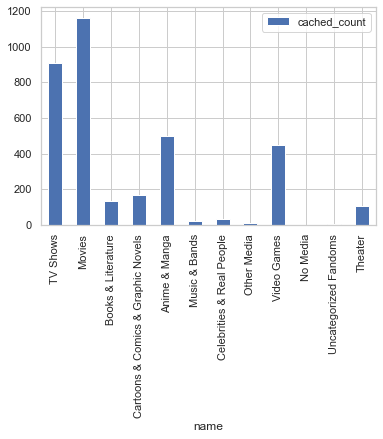

In [46]:
ax = medium_tags.plot.bar(x='name', y='cached_count')

# Category Analysis: Rating

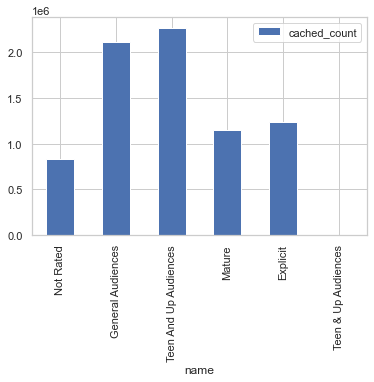

In [47]:
ax = rating_tags.plot.bar(x='name', y='cached_count')

# Category Analysis: Archive Warnings

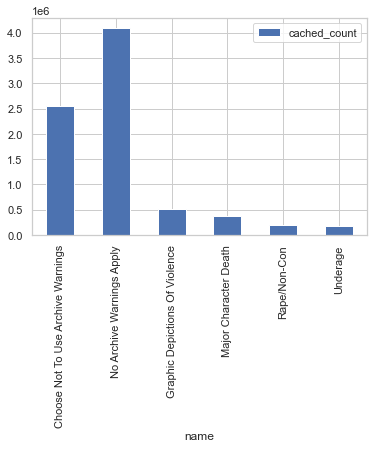

In [48]:
ax = archwarn_tags.plot.bar(x='name', y='cached_count')

# Category Analysis: Category

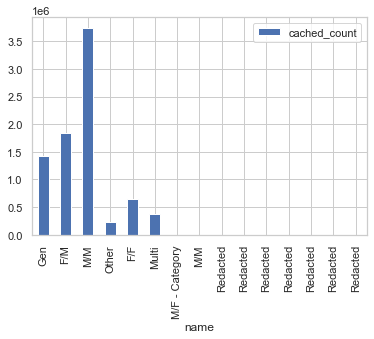

In [49]:
ax = category_tags.plot.bar(x='name', y='cached_count')

# Category Analysis: Fandom

In [65]:
big_fandoms = fandom_tags[fandom_tags["cached_count"]>100000]
big_fandoms

,id,type,name,canonical,cached_count,merger_id
25,27,Fandom,Supernatural,True,310300,NaN
2303,2692,Fandom,Original Work,True,105960,NaN
5974,7266,Fandom,Marvel,True,147757,NaN
11296,13999,Fandom,Naruto,True,105108,NaN
92059,133185,Fandom,Sherlock (TV),True,151925,NaN
94292,136512,Fandom,Harry Potter - J. K. Rowling,True,361919,NaN
168289,258526,Fandom,Teen Wolf (TV),True,172802,NaN
230408,414093,Fandom,Marvel Cinematic Universe,True,240536,NaN
494603,758208,Fandom,Haikyuu!!,True,130918,NaN
679946,1001939,Fandom,The Avengers (Marvel Movies),True,157813,NaN


In [66]:
small_fandoms = fandom_tags[fandom_tags["cached_count"]<1000]
small_fandoms

,id,type,name,canonical,cached_count,merger_id
27,31,Fandom,Redacted,False,5,25968.0
33,37,Fandom,Boondock Saints (1999),False,47,223663.0
44,56,Fandom,Gravitation (Anime),False,6,2769.0
69,83,Fandom,Chronicles of Narnia,False,133,287734.0
72,86,Fandom,Redacted,False,0,148657.0
...,...,...,...,...,...,...
14466583,55393953,Fandom,Карнавальная ночь | Carnival Night (1956),True,0,NaN
14466639,55394121,Fandom,Brain Dump (Web Series),True,0,NaN
14466697,55394295,Fandom,Redacted,False,3,NaN
14466959,55395081,Fandom,In the Reign of Terror - G. A. Henty,True,0,NaN


In [91]:
ultrasmall_fandoms = fandom_tags[(fandom_tags["cached_count"]<100) & (fandom_tags["canonical"])]
ultrasmall_fandoms

,id,type,name,canonical,cached_count,merger_id
288,340,Fandom,Manic Street Preachers,True,72,NaN
339,413,Fandom,Savage Garden,True,19,NaN
358,442,Fandom,Blades of Glory (2007),True,78,NaN
426,519,Fandom,The Kingdom (2007),True,1,NaN
617,729,Fandom,Fastlane,True,80,NaN
...,...,...,...,...,...,...
14466435,55393509,Fandom,Calamity! - MANIAC POP (Web Series),True,0,NaN
14466501,55393707,Fandom,Card Force Infection - KiraHeartilly36,True,0,NaN
14466583,55393953,Fandom,Карнавальная ночь | Carnival Night (1956),True,0,NaN
14466639,55394121,Fandom,Brain Dump (Web Series),True,0,NaN


In [56]:
print("Number of fandom tags:", len(fandom_tags))

Number of fandom tags: 204858


In [16]:
print("Number of relationship tags:", len(relat_tags))

Number of relationship tags: 2048295


In [15]:
print("Number of character tags:", len(char_tags))

Number of character tags: 1509000


In [13]:
print("Number of freeform tags:", len(freeform_tags))

Number of freeform tags: 9244331


In [14]:
print("Number of unsorted tags:", len(unsorted_tags))

Number of unsorted tags: 1460615


## 2.2 - Works

In [4]:
print(works[:5])

  creation date language  restricted  complete  word_count  \
0    2021-02-26       en       False      True       388.0   
1    2021-02-26       en       False      True      1638.0   
2    2021-02-26       en       False      True      1502.0   
3    2021-02-26       en       False      True       100.0   
4    2021-02-26       en       False      True       994.0   

                                                tags  Unnamed: 6  
0  10+414093+1001939+4577144+1499536+110+4682892+...         NaN  
1  10+20350917+34816907+23666027+23269305+2326930...         NaN  
2  10+10613413+9780526+3763877+3741104+7657229+30...         NaN  
3  10+15322+54862755+20595867+32994286+663+471751...         NaN  
4  11+721553+54604+1439500+3938423+53483274+54862...         NaN  


**Tentative Index Slices for Tag Categories**

<ul>
    <li>Medium_Tags: [1:9]</li>
    <li>Rating_Tags: [9:14]</li>
    <li>ArchWarn_Tags: [14:21]</li>
    <li>PairCat_Tags: [21:25]</li>
    

</ul>